EXPLORATORY DATA ANALYSIS ON THE RATE OF ATTRITION OF EMPLOYEES FROM A COMPANY... 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("employee_attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [5]:
df.shape

(1029, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [7]:
df.isnull().sum()/1029

Age                         0.132167
Attrition                   0.000000
BusinessTravel              0.004859
DailyRate                   0.026239
Department                  0.000000
DistanceFromHome            0.092323
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.004859
MonthlyIncome               0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
RelationshipSatisfaction    0.000000
StandardHours               0.000000
S

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.926092,9.395467,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.Age.nunique(dropna=True)

39

In [11]:
df.BusinessTravel.nunique(dropna=True)

3

In [12]:
df.DailyRate.nunique(dropna=True)

692

In [13]:
df.MaritalStatus.nunique(dropna=True)

3

In [14]:
df.DistanceFromHome.nunique(dropna=True)

27

In [15]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [16]:
df['DailyRate']=df['DailyRate'].fillna(df['DailyRate'].mean())

In [17]:
df['DistanceFromHome']=df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean())

In [18]:
df['BusinessTravel']=df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])

In [19]:
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1029 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          1029 non-null   float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [21]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1029.0,37.926092,8.751938,18.0,32.0,37.926092,43.0,60.0
DailyRate,1029.0,800.528942,402.714749,102.0,466.0,800.528942,1153.0,1496.0
DistanceFromHome,1029.0,9.930407,8.023220,1.0,2.0,9.000000,14.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.0,3.000000,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.0,1.000000,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.0,1019.000000,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.0,3.000000,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.0,67.000000,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.0,3.000000,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.0,2.000000,3.0,5.0


In [23]:
df['Age'].value_counts()

37.926092    136
29.000000     49
36.000000     48
34.000000     48
31.000000     47
30.000000     42
33.000000     42
32.000000     42
40.000000     39
38.000000     38
27.000000     37
42.000000     35
37.000000     31
41.000000     31
45.000000     29
39.000000     27
43.000000     26
46.000000     22
50.000000     21
55.000000     19
51.000000     17
24.000000     17
44.000000     16
53.000000     15
52.000000     15
48.000000     14
49.000000     14
54.000000     13
22.000000     13
47.000000     13
23.000000     12
20.000000     10
56.000000     10
58.000000      8
21.000000      8
19.000000      7
59.000000      7
18.000000      5
57.000000      3
60.000000      3
Name: Age, dtype: int64

In [24]:
df['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

In [25]:
df['Attrition'] = np.where(df['Attrition']=='Yes', 1,0)


In [26]:
df['Attrition'].value_counts()

0    853
1    176
Name: Attrition, dtype: int64

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [28]:
df['BusinessTravel'].value_counts()

Travel_Rarely        728
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

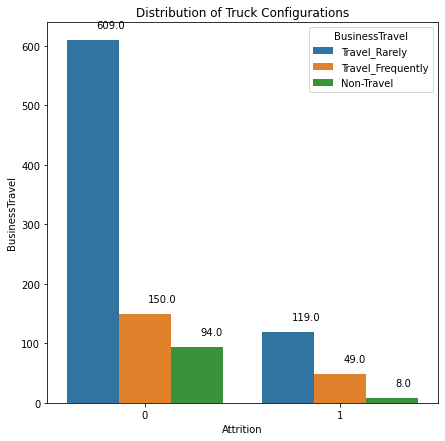

In [29]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x='Attrition', hue='BusinessTravel', data=df)
plt.title('Distribution of Truck Configurations')
plt.xlabel('Attrition')
plt.ylabel('BusinessTravel')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+20))

ppl who travel rarely are less likely to attrition

In [30]:
df['DailyRate'].value_counts()

800.528942     27
329.000000      4
117.000000      4
1329.000000     4
530.000000      4
               ..
1402.000000     1
481.000000      1
1266.000000     1
1154.000000     1
264.000000      1
Name: DailyRate, Length: 693, dtype: int64

[Text(0, 0, 'Research Director'),
 Text(1, 0, 'Manufacturing Director'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Manager'),
 Text(4, 0, 'Healthcare Representative'),
 Text(5, 0, 'Research Scientist'),
 Text(6, 0, 'Sales Executive'),
 Text(7, 0, 'Laboratory Technician'),
 Text(8, 0, 'Human Resources')]

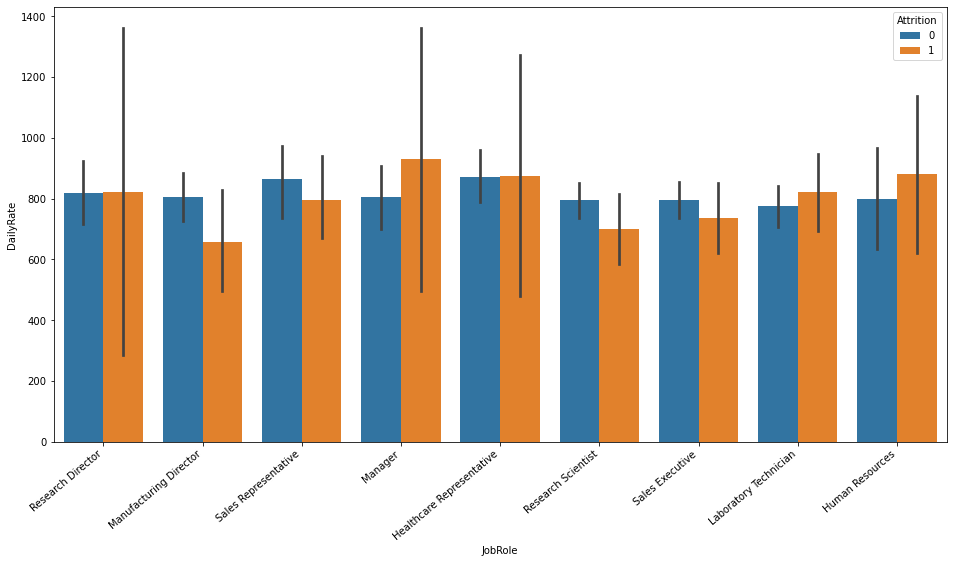

In [31]:
plt.figure(figsize=(16,8))

ax = sns.barplot(x='JobRole', y='DailyRate', hue='Attrition', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

We see that healthcare representatives earn the most and managers are more likely to be attrited 

In [32]:
df['Department'].value_counts()

Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome'>

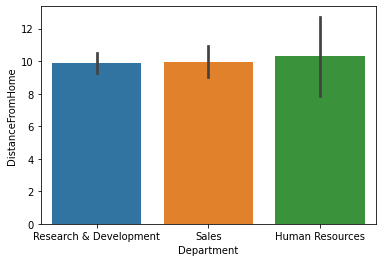

In [33]:
sns.barplot(x='Department', y='DistanceFromHome', data=df)

The Human resources department members travel the most


<AxesSubplot:xlabel='Education', ylabel='JobRole'>

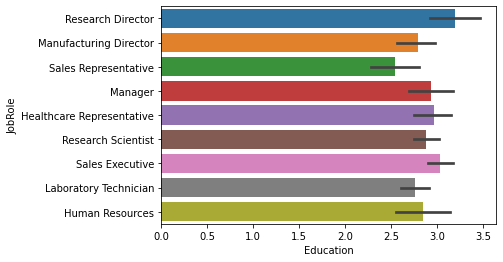

In [34]:
sns.barplot(x="Education", y='JobRole', data=df)

Employees as Research Directors have the max number of degress to their name

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [36]:
df['DistanceFromHome'].value_counts()

1.000000     147
2.000000     141
9.930407      95
9.000000      68
8.000000      57
10.000000     57
7.000000      53
4.000000      50
6.000000      43
26.000000     24
16.000000     22
18.000000     22
11.000000     21
25.000000     20
24.000000     19
29.000000     18
12.000000     17
23.000000     17
28.000000     17
22.000000     16
19.000000     16
14.000000     15
15.000000     15
17.000000     14
13.000000     12
21.000000     12
20.000000     11
27.000000     10
Name: DistanceFromHome, dtype: int64

In [37]:
#sns.barplot(x='DistanceFromHome', y='Attrition', data=df)

In [38]:
df['Education'].value_counts()

3    386
4    279
2    194
1    134
5     36
Name: Education, dtype: int64

In [39]:
df['EducationField'].value_counts()

Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

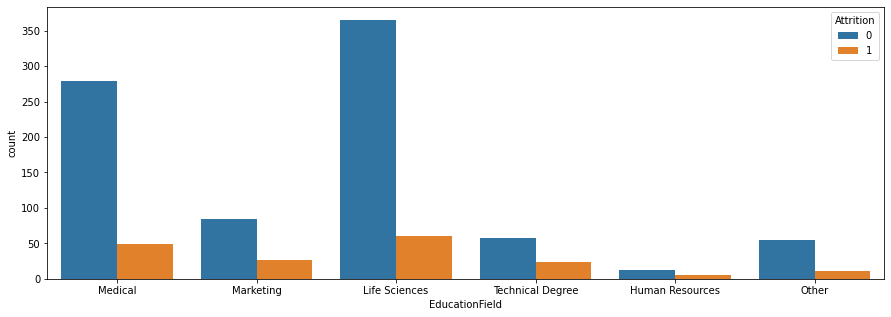

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x="EducationField", hue='Attrition', data=df)

The rate of attrition is highest for employees under LifeSciences and least for HR employees

In [41]:
df['EmployeeCount'].value_counts()

1    1029
Name: EmployeeCount, dtype: int64

In [42]:
#df['EmployeeCount'].value_counts()

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [44]:
df['Gender'].value_counts()

Male      617
Female    412
Name: Gender, dtype: int64

In [45]:
df['Gender'] = np.where(df['Gender']=='Male', 2, 1)

In [46]:
df['Gender'].value_counts()

2    617
1    412
Name: Gender, dtype: int64

In [47]:
df['HourlyRate'].value_counts()

48    25
79    24
98    23
87    23
72    20
      ..
89    10
38     9
51     9
31     9
50     6
Name: HourlyRate, Length: 71, dtype: int64

In [48]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [49]:
df['MaritalStatus'].value_counts()

Married     479
Single      320
Divorced    230
Name: MaritalStatus, dtype: int64

In [50]:
df['MonthlyIncome'].value_counts()

2342     3
2451     3
2610     3
2404     3
6347     3
        ..
4306     1
10845    1
2587     1
4668     1
19331    1
Name: MonthlyIncome, Length: 963, dtype: int64

<AxesSubplot:xlabel='StockOptionLevel', ylabel='MonthlyIncome'>

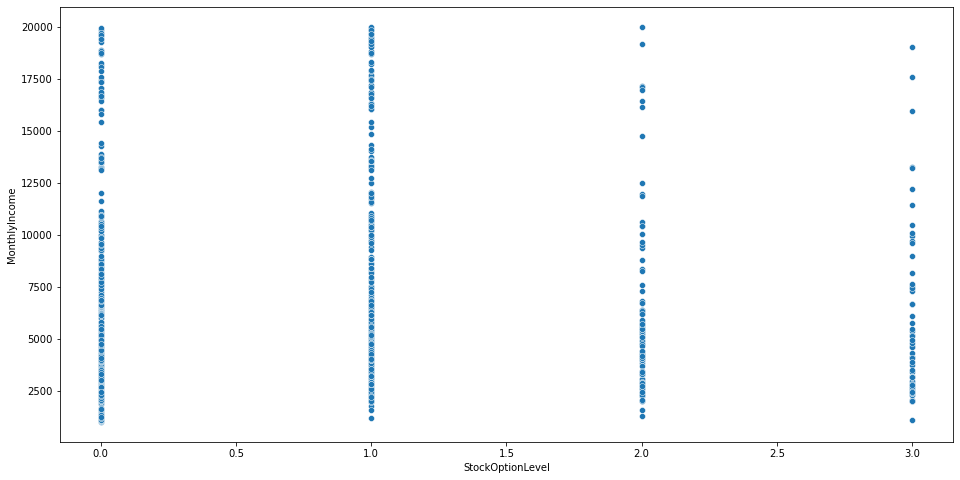

In [51]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='StockOptionLevel', y='MonthlyIncome', data=df)

In [52]:
df['JobInvolvement'].value_counts()

3    606
2    269
4     94
1     60
Name: JobInvolvement, dtype: int64

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '40')]

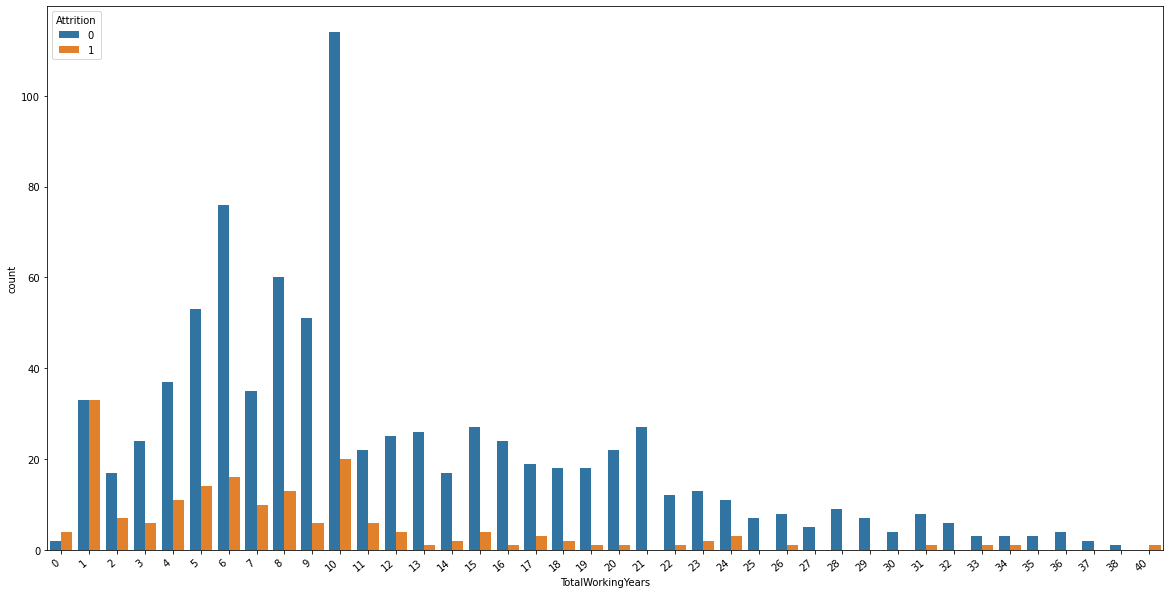

In [53]:
plt.figure(figsize=(20,10))
ax = sns.countplot(hue='Attrition', x='TotalWorkingYears', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Employees with less experience have higher chance of attrition

In [54]:
df['JobRole'].value_counts()

Sales Executive              217
Research Scientist           214
Laboratory Technician        179
Manufacturing Director        95
Healthcare Representative     89
Manager                       73
Sales Representative          66
Research Director             62
Human Resources               34
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

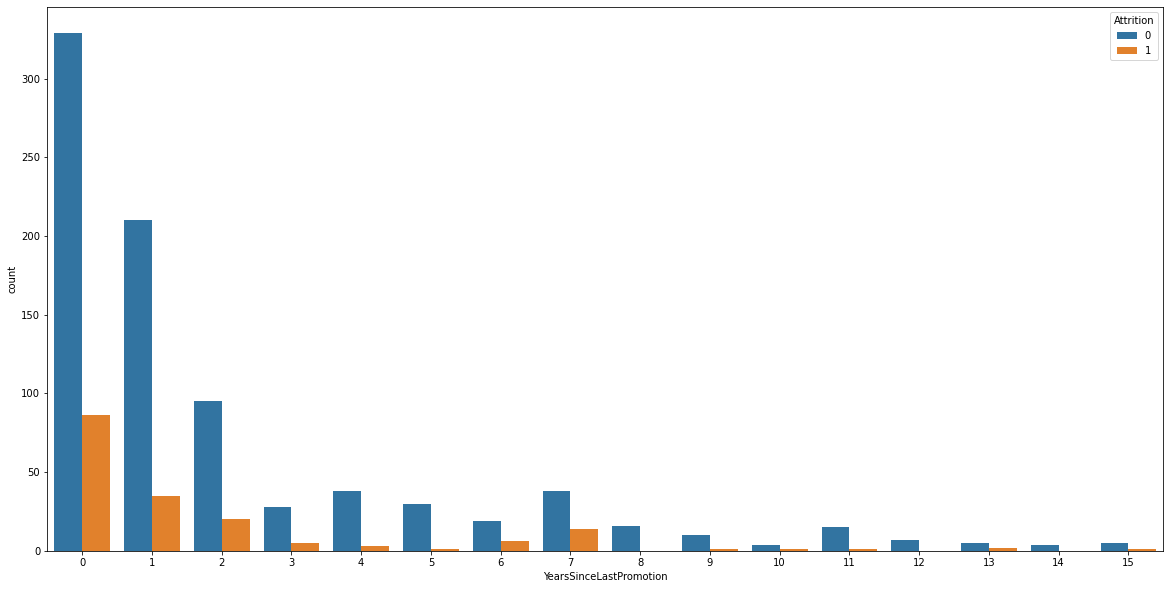

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)

In [56]:
df['JobSatisfaction'].value_counts()

4    315
3    301
2    215
1    198
Name: JobSatisfaction, dtype: int64

In [57]:
df['NumCompaniesWorked'].value_counts()

1    377
0    138
2    109
3    105
4     85
7     51
6     49
5     43
9     38
8     34
Name: NumCompaniesWorked, dtype: int64

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [59]:
df['Over18'].value_counts()

Y    1029
Name: Over18, dtype: int64

In [60]:
df = df.drop(columns = ['Over18'])


In [61]:
df['OverTime'].value_counts()

No     731
Yes    298
Name: OverTime, dtype: int64

In [62]:
df['OverTime'] = np.where(df['OverTime']=='Yes', 1, 2)

In [63]:
df['OverTime'].value_counts()

2    731
1    298
Name: OverTime, dtype: int64

In [64]:
df['StandardHours'].value_counts()

80    1029
Name: StandardHours, dtype: int64

In [65]:
df.drop(columns=['StandardHours'], inplace=True)

In [66]:
df['EmployeeNumber'].value_counts()

997     1
1099    1
797     1
64      1
1618    1
       ..
1282    1
1655    1
771     1
1767    1
1591    1
Name: EmployeeNumber, Length: 1029, dtype: int64

In [2]:
# df.drop(columns=['EmployeeNumber'], inplace=True)

# Conclusion...

Thus , from above analysis , we can conclude the following :
1. ppl who travel rarely are less likely to attrition as such human resorce travel much and less likely to leave the company.
2. We see that healthcare representatives earn the most and managers are more likely to be attrited.
3. We see that healthcare representatives earn the most and managers are more likely to be attrited
4. Top Stock option is NOT so widely provided for employees with high salary thus increasing thr rate of attrition for those.
5. Employees with less experience have higher chance of attrition , the company should change their behaviour and work culture towards freshers to obvercome the rate of attrition among freshers.
